# Librerias, funciones e inputs 

### Carga general y para el traer todos los periodos

In [2]:

import os #Manejo de carpetas

from selenium import webdriver #Manejo de navegador
import pandas as pd #Tablas
import numpy as np #Numeros
import locale #Fechas
locale.setlocale(locale.LC_ALL, 'es_ES.utf8') #Fechas
import matplotlib.pyplot as plt #Graficos
from datetime import datetime, date #fechas
from dateutil.relativedelta import relativedelta #fechas
pd.options.mode.chained_assignment = None #Menos carteles

from ipywidgets import interact  #Graficos
import plotly.express as px #Graficos
import plotly.graph_objects as go #Graficos

#Funcion de navegación
def buscar_link(bank_code, report, report_type, date):
    driver.get('http://www.bcra.gov.ar/SistemasFinancierosYdePagos/EFIT_'+report+'.asp?bco=' + bank_code + '&info=' + report_type)
    driver.find_element_by_xpath('//button[contains(text(),"'+date +'")]').click()

#Fechas para el loop
fechas=["Dic-2018","Dic-2019","Jun-2020", "Sep-2020"]

#Distintos balances 
reportes=["Estado_Situacion_Financiera", "Estado_Resultados", "Clasificacion_Prestamos"]
reportes2=[ "Concentracion_Prestamos_Otras_Financiaciones", "Concentracion_Depositos"]   

# diccionario de codigos bancarios
bank_dict = {
    'BACS BANCO DE CRÉDITO Y SECURITIZACIÓN': '00340',
    'BANCO BICA S.A.': '00426',
    'BANCO BRADESCO ARGENTINA S.A.U.': '00336',
    'BANCO CETELEM ARGENTINA S.A.': '00331',
    'BANCO CMF S.A.': '00319',
    'BANCO COINAG S.A.': '00431',
    'BANCO COLUMBIA S.A.': '00389',
    'BANCO COMAFI S.A.': '00299',
    'BANCO CREEDICOP COOPERATIVO LIMITADO': '00191',
    'BANCO DE COMERCIO S.A.': '00432',
    'BANCO DE CORRIENTES S.A.': '00094',
    'BANCO DE FORMOSA S.A.': '00315',
    'BANCO DE GALICIA Y BUENOS AIRES S.A.U.': '00007',
    'BANCO DE INVERSIÓN Y COMERCIO EXTERIOR S.A.': '00300',
    'BANCO DE LA CIUDAD DE BUENOS AIRES': '00029',
    'BANCO DE LA NACION ARGENTINA': '00011',
    'BANCO DE LA PAMPA SOCIEDAD DE ECONOMÍA MIXTA': '00093',
    'BANCO DE LA PROVINCIA DE BUENOS AIRES': '00014',
    'BANCO DE LA PROVINCIA DE CÓRDOBA S.A.': '00020',
    'BANCO DE LA REPÚBLICA ORIENTAL DEL URUGUAY': '00269',
    'BANCO DE SAN JUAN S.A.': '00045',
    'BANCO DE SANTA CRUZ S.A.': '00086',
    'BANCO DE SANTIAGO DEL ESTERO S.A.': '00321',
    'BANCO DE SERVICIOS FINANCIEROS S.A.': '00332',
    'BANCO DE SERVICIOS Y TRANSACCIONES S.A.': '00338',
    'BANCO DE VALORES S.A.': '00198',
    'BANCO DEL CHUBUT S.A.': '00083',
    'BANCO DEL SOL S.A.': '00310',
    'BANK OF CHINA LIMITED SUCURSAL BUEN': '00515',
    'BANCO HIPOTECARIO S.A.': '00044',
    'BANCO INDUSTRIAL S.A.': '00322',
    'BANCO INTERFINANZAS S.A.': '00147',
    'BANCO ITAU ARGNETINA S.A.': '00259',
    'BANCO JULIO S.A.': '00305',
    'BANCO MACRO S.A.': '00285',
    'BANCO MARIVA S.A.': '00254',
    'BANCO MASVENTAS S.A.': '00341',
    'BANCO MERIDIAN S.A.': '00281',
    'BANCO MUNICIPAL DE ROSARIO': '00065',
    'BANCO PATAGONIA S.A.': '00034',
    'BANCO PIANO S.A.': '00301',
    'BANCO PROVINCIA DE TIERRA DEL FUEGO': '00268',
    'BANCO PROVINCIA DEL NEUQUÉN S.A.': '00097',
    'BANCO RIOJA S.A.U.': '00309',
    'BANCO ROELA S.A.': '00247',
    'BANCO SAENZ S.A.': '00277',
    'BANCO SANTANDER RIO S.A.': '00072',
    'BANCO SUPERVIELLE S.A.': '00027',
    'BANCO VOII S.A.': '00312',
    'BANK OF AMERICA NATIONAL ASSOCIATION': '00262',
    'BBVA BANCO FRANCES S.A.': '00017',
    'BNP PARIBAS': '00266',
    'BRUBANK S.A.U.': '00143',
    'CAJA DE CRÉDITO CUENCA COOPERATIVA': '65203',
    'CITIBANK N.A.': '00016',
    'COMPAÑÍA FINANCIERA ARGENTINA S.A.': '44077',
    'CORDIAL COMPAÑÍA FINANCIERA S.A.': '44090',
    'FCA COMPAÑÍA FINANCIERA S.A.': '44092',
    'BANCO DINO S.A.': '00448',
    'FORD CREDIT COMPAÑÍA FINANCIERA S.A.': '44059',
    'GPAT COMPAÑÍA FINANCIERA S.A.U.': '44093',
    'HSBC BANK ARGENTINA S.A.': '00150',
    'ICBC (ARGENTINA) S.A.': '00015',
    'JOHN DEERE CREDIT COMPAÑÍA FINANCIERA': '44096',
    'JP MORGAN CHASE BANK, NATIONAL ASSOCIATION': '00165',
    'MERCEDES-BENZ COMPAÑÍA FINANCIERA ARGENTINA S.A.': '44094',
    'MONTEMAR COMPAÑÍA FINANCIERA S.A.': '45056',
    'BANCO SUCREDITO REGIONAL S.A.U.': '00435',
    'NUEVO BANCO DE ENTRE RÍOS S.A.': '00386',
    'NUEVO BANCO DE SANTA FE S.A.': '00330',
    'NUEVO BANCO DEL CHACO S.A.': '00311',
    'PSA FINANCE ARGENTINA COMPAÑÍA FINANCIERA S.A.': '44098',
    'RCI BANQUE S.A.': '00339',
    'ROMBO COMPAÑÍA FINANCIERA S.A.': '44095',
    'TOYOTA COMPAÑÍA FINANCIERA DE ARGENTINA S.A.': '44099',
    'TRANSATLÁNTICA COMPAÑÍA FINANCIERA S.A.': '45072',
    'VOLKSWAGEN FINANCIAL SERVICES COMPAÑÍA FINANCIERA S.A.': '44088',
    'WILOBANK S.A.': '00384'
 
}


#Bancos calificados
calificados=['BANCO COMAFI S.A.',
'BANCO DE GALICIA Y BUENOS AIRES S.A.U.',
'BANCO DE LA PROVINCIA DE CÓRDOBA S.A.',
'BANCO DE VALORES S.A.',
'BANCO HIPOTECARIO S.A.',
'BANCO ITAU ARGNETINA S.A.',
'BANCO MACRO S.A.',
'BANCO PATAGONIA S.A.',
'BANCO PIANO S.A.',
'BANCO RIOJA S.A.U.',
'BANCO SANTANDER RIO S.A.',
'BNP PARIBAS',
'GPAT COMPAÑÍA FINANCIERA S.A.U.',
'HSBC BANK ARGENTINA S.A.',
'ICBC (ARGENTINA) S.A.',
'JOHN DEERE CREDIT COMPAÑÍA FINANCIERA',
'PSA FINANCE ARGENTINA COMPAÑÍA FINANCIERA S.A.',
'ROMBO COMPAÑÍA FINANCIERA S.A.'
]

pattern = '|'.join(calificados)


### Baja el Anexo R en pdf

In [28]:
def get_non_temp_len(download_dir):
    non_temp_files = [i for i in os.listdir(path_notas) if not (i.endswith('.tmp') or i.endswith('.crdownload'))]
    return len(non_temp_files)

fecha="Sep-2020"

for bank_name in calificados:
    path_notas = r"C:\Users\WeigandI\moodys.com\Gomez Barreca, Eliana - FIG Moodys Local - Shared with ML FIG team\Bancos Argentina\Balances\Notas\{}\{}".format(fecha,bank_name)
    
    try:
        os.makedirs(path_notas)
    except OSError:
        print ("No se pudo crear la carpeta {}_{}".format(fecha,bank_name))
    else:
        print ("Se creó la carpeta {}_{}".format(fecha,bank_name))
        
    options = webdriver.ChromeOptions()
    options.add_experimental_option('prefs', {
    "download.default_directory": path_notas, 
    "download.prompt_for_download": False, 
    "download.directory_upgrade": True,
    "plugins.always_open_pdf_externally": True 
    })
    driver = webdriver.Chrome(r"C:\Users\WeigandI\moodys.com\Bogarin, Juan - Moody's Local Automation Team\chromedriver.exe", options=options) 

    bank_code = bank_dict[bank_name]
    print('Printing bank:{}_{}'.format(bank_name, fecha))
    try:
        buscar_link(bank_code, "Notas",'individual',fecha)
        driver.find_element_by_xpath("//a[contains(@onclick,'ANEXO R')]").click()

    except:
        print('No se pudo obtener la información del banco ' + bank_name)
    original_count = get_non_temp_len(path_notas)
    while original_count == get_non_temp_len(path_notas):
        time.sleep(.5) # wait for file count to change
    driver.quit()

Creation of the directory C:\Users\WeigandI\moodys.com\Gomez Barreca, Eliana - FIG Moodys Local - Shared with ML FIG team\Bancos Argentina\Balances\Notas\Sep-2020\BANCO COMAFI S.A. failed
Printing bank:BANCO COMAFI S.A._Sep-2020
Successfully created the directory C:\Users\WeigandI\moodys.com\Gomez Barreca, Eliana - FIG Moodys Local - Shared with ML FIG team\Bancos Argentina\Balances\Notas\Sep-2020\BANCO DE GALICIA Y BENOS AIRES S.A.U. 
Printing bank:BANCO DE GALICIA Y BENOS AIRES S.A.U._Sep-2020
Successfully created the directory C:\Users\WeigandI\moodys.com\Gomez Barreca, Eliana - FIG Moodys Local - Shared with ML FIG team\Bancos Argentina\Balances\Notas\Sep-2020\BANCO DE LA PROVINCIA DE CÓRDOBA S.A. 
Printing bank:BANCO DE LA PROVINCIA DE CÓRDOBA S.A._Sep-2020
Successfully created the directory C:\Users\WeigandI\moodys.com\Gomez Barreca, Eliana - FIG Moodys Local - Shared with ML FIG team\Bancos Argentina\Balances\Notas\Sep-2020\BANCO DE VALORES S.A. 
Printing bank:BANCO DE VALORES S

### Baja Estado Situacion Financiera, Estado Resultados, Clasificacion Prestamos

In [ ]:
driver = webdriver.Chrome(r"C:\Users\WeigandI\moodys.com\Bogarin, Juan - Moody's Local Automation Team\chromedriver.exe")

lista=list()
for report in reportes:
    for fecha in fechas:


        for bank_name in bank_dict:

            bank_code = bank_dict[bank_name]
            #arranco buscando el individual
            print('Printing bank:{}_{}_{}'.format(bank_name, fecha, report))

            try:
                buscar_link(bank_code, report, 'individual',fecha)
                #soup = BeautifulSoup(driver.page_source, 'html.parser')

                df=pd.read_html(driver.page_source,decimal=',', thousands='.')[1]

                #chequeo que exista el consolidado. Si tiene una sola linea, solo hay individual.
                if len(df) == 0:

                    #el individual esta vacío, solo bajo el consolidado (que en realidad es el individual)
                    buscar_link(bank_code,report, 'consolidado',fecha)
                    df=pd.read_html(driver.page_source,decimal=',', thousands='.')[1]
                    if report=="Estado_Situacion_Financiera":
                        df=df.iloc[:,[0,2,3]]
                        ind_pas=df[df.iloc[:,0]=="TOTAL DE ACTIVO"].index[0]
                        df.iloc[0:ind_pas,0].loc[df.iloc[0:ind_pas,0]=="OPERACIONES DE PASE"]="OPERACIONES DE PASE ACTIVO"
                        df.iloc[ind_pas:,0].loc[df.iloc[ind_pas:,0]=="OPERACIONES DE PASE"]="OPERACIONES DE PASE PASIVO"
                        df.iloc[0:ind_pas,0].loc[df.iloc[0:ind_pas,0]=='INSTRUMENTOS DERIVADOS']='INSTRUMENTOS DERIVADOS ACTIVO'
                        df.iloc[ind_pas:,0].loc[df.iloc[ind_pas:,0]=='INSTRUMENTOS DERIVADOS']='INSTRUMENTOS DERIVADOS PASIVO'
                    elif report=="Clasificacion_Prestamos":
                        df=df.iloc[:,[0,1,2]]
                    else:
                        if fecha[0:3]=="Dic":
                            df=df.iloc[:,[0,2,3]]
                        else:    
                            df=df.iloc[:,[0,4,5]]
                    df.columns=["Variable", "Saldo", "Saldo Y-1"]
                    df["Balance"]="Consolidado"
                    df["Banco"]=bank_name
                    df["Fecha"]=fecha
                    df["Reporte"]=report
                    lista.append(df)
                else:
                    df=pd.read_html(driver.page_source,decimal=',', thousands='.')[1]
                    if report=="Estado_Situacion_Financiera":
                        df=df.iloc[:,[0,2,3]]
                        ind_pas=df[df.iloc[:,0]=="TOTAL DE ACTIVO"].index[0]
                        df.iloc[0:ind_pas,0].loc[df.iloc[0:ind_pas,0]=="OPERACIONES DE PASE"]="OPERACIONES DE PASE ACTIVO"
                        df.iloc[ind_pas:,0].loc[df.iloc[ind_pas:,0]=="OPERACIONES DE PASE"]="OPERACIONES DE PASE PASIVO"
                        df.iloc[0:ind_pas,0].loc[df.iloc[0:ind_pas,0]=='INSTRUMENTOS DERIVADOS']='INSTRUMENTOS DERIVADOS ACTIVO'
                        df.iloc[ind_pas:,0].loc[df.iloc[ind_pas:,0]=='INSTRUMENTOS DERIVADOS']='INSTRUMENTOS DERIVADOS PASIVO'
                    elif report=="Clasificacion_Prestamos":
                        df=df.iloc[:,[0,1,2]]
                    else:
                        if fecha[0:3]=="Dic":
                            df=df.iloc[:,[0,2,3]]
                        else:    
                            df=df.iloc[:,[0,4,5]]
                    df.columns=["Variable", "Saldo", "Saldo Y-1"]
                    df["Balance"]="Individual"
                    df["Banco"]=bank_name
                    df["Fecha"]=fecha
                    df["Reporte"]=report
                    lista.append(df)

                    buscar_link(bank_code, report,'consolidado',fecha)
                    df=pd.read_html(driver.page_source,decimal=',', thousands='.')[1]
                    if report=="Estado_Situacion_Financiera":
                        df=df.iloc[:,[0,2,3]]
                        ind_pas=df[df.iloc[:,0]=="TOTAL DE ACTIVO"].index[0]
                        df.iloc[0:ind_pas,0].loc[df.iloc[0:ind_pas,0]=="OPERACIONES DE PASE"]="OPERACIONES DE PASE ACTIVO"
                        df.iloc[ind_pas:,0].loc[df.iloc[ind_pas:,0]=="OPERACIONES DE PASE"]="OPERACIONES DE PASE PASIVO"
                        df.iloc[0:ind_pas,0].loc[df.iloc[0:ind_pas,0]=='INSTRUMENTOS DERIVADOS']='INSTRUMENTOS DERIVADOS ACTIVO'
                        df.iloc[ind_pas:,0].loc[df.iloc[ind_pas:,0]=='INSTRUMENTOS DERIVADOS']='INSTRUMENTOS DERIVADOS PASIVO'

                    elif report=="Clasificacion_Prestamos":
                        df=df.iloc[:,[0,1,2]]
                    else:
                        if fecha[0:3]=="Dic":
                            df=df.iloc[:,[0,2,3]]
                        else:    
                            df=df.iloc[:,[0,4,5]]
                    df.columns=["Variable", "Saldo", "Saldo Y-1"]
                    df["Balance"]="Consolidado"
                    df["Banco"]=bank_name
                    df["Fecha"]=fecha
                    df["Reporte"]=report
                    lista.append(df)
            except:
                print('No se pudo obtener la información del banco ' + bank_name)

    
    
driver.quit()
balances=pd.concat(lista) 
print('All done.')
    


Printing bank:BACS BANCO DE CRÉDITO Y SECURITIZACIÓN_Dic-2018_Estado_Situacion_Financiera
Printing bank:BANCO BICA S.A._Dic-2018_Estado_Situacion_Financiera
Printing bank:BANCO BRADESCO ARGENTINA S.A.U._Dic-2018_Estado_Situacion_Financiera


### Baja la concentración de préstamos y depósitos

In [305]:
driver = webdriver.Chrome(r"C:\Users\WeigandI\moodys.com\Bogarin, Juan - Moody's Local Automation Team\chromedriver.exe")

lista2=list()
for report in reportes2:
    for fecha in fechas:


        for bank_name in bank_dict:

            bank_code = bank_dict[bank_name]
            #arranco buscando el individual
            print('Printing bank:{}_{}_{}'.format(bank_name, fecha, report))

            try:
                buscar_link(bank_code, report, 'individual',fecha)
                #soup = BeautifulSoup(driver.page_source, 'html.parser')

                df=pd.read_html(driver.page_source,decimal=',', thousands='.')[1]

                #chequeo que exista el consolidado. Si tiene una sola linea, solo hay individual.
                if len(df) == 0:

                    #el individual esta vacío, solo bajo el consolidado (que en realidad es el individual)
                    buscar_link(bank_code,report, 'consolidado',fecha)
                    df=pd.read_html(driver.page_source,decimal=',', thousands='.')[1]
                    df=df.iloc[:,[0,2]]
                    df.columns=["Variable", "Saldo"]
                    df["Balance"]="Consolidado"
                    df["Banco"]=bank_name
                    df["Fecha"]=fecha
                    df["Reporte"]=report
                    lista.append(df)
                else:
                    df=pd.read_html(driver.page_source,decimal=',', thousands='.')[1]
                    df=df.iloc[:,[0,2]]
                    df.columns=["Variable", "Saldo"]
                    df["Balance"]="Individual"
                    df["Banco"]=bank_name
                    df["Fecha"]=fecha
                    df["Reporte"]=report
                    lista.append(df)

                    buscar_link(bank_code, report,'consolidado',fecha)
                    df=pd.read_html(driver.page_source,decimal=',', thousands='.')[1]
                    df=df.iloc[:,[0,2]]
                    df.columns=["Variable", "Saldo"]
                    df["Balance"]="Consolidado"
                    df["Banco"]=bank_name
                    df["Fecha"]=fecha
                    df["Reporte"]=report
                    lista2.append(df)
                
            except:
                print('No se pudo obtener la información del banco ' + bank_name)

    
    
driver.quit()
concentracion=pd.concat(lista2)  
print('All done.')
 
concentracion.loc[concentracion["Reporte"]=="Concentracion_Prestamos_Otras_Financiaciones", "Variable"]=concentracion.loc[concentracion["Reporte"]=="Concentracion_Prestamos_Otras_Financiaciones", "Variable"].astype(str)+"(Pres)"
concentracion.loc[concentracion["Reporte"]=="Concentracion_Depositos", "Variable"]=concentracion.loc[concentracion["Reporte"]=="Concentracion_Depositos", "Variable"].astype(str)+"(Dep)"
concentracion["Saldo"]=concentracion["Saldo"].str.replace('%','')
concentracion["Saldo"]=concentracion["Saldo"].str.replace(',','.')

#concentracion["Fecha"]=concentracion["Fecha"].apply(lambda x: x.replace('Dic', 'Dec'))
#concentracion=concentracion.dropna(subset=["Variable"])


#concentracion=concentracion[pd.to_numeric(concentracion["Saldo"], errors='coerce').notnull()]
#concentracion["Saldo"]=concentracion["Saldo"].astype(float)
#concentracion2=concentracion.pivot_table(index=["Fecha","Banco","Balance"], columns="Variable", values="Saldo")
#concentracion2 = concentracion2.fillna(0)
#concentracion2=concentracion2.reset_index()
#concentracion2=concentracion2[['Fecha', 'Banco', 'Balance', '10 MAYORES CLIENTES(Dep)',
#       '10 MAYORES CLIENTES(Pres)','50 SIGUIENTES MAYORES CLIENTES(Dep)',
#       '50 SIGUIENTES MAYORES CLIENTES(Pres)']]


Printing bank:BACS BANCO DE CRÉDITO Y SECURITIZACIÓN_Dic-2018_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO BICA S.A._Dic-2018_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO BRADESCO ARGENTINA S.A.U._Dic-2018_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO CETELEM ARGENTINA S.A._Dic-2018_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO CMF S.A._Dic-2018_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO COINAG S.A._Dic-2018_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO COLUMBIA S.A._Dic-2018_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO COMAFI S.A._Dic-2018_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO CREEDICOP COOPERATIVO LIMITADO_Dic-2018_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE COMERCIO S.A._Dic-2018_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE CORRIENTES S.A._Dic-2018_Concentracion_Prestamos_O

Printing bank:BANCO BRADESCO ARGENTINA S.A.U._Dic-2019_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO CETELEM ARGENTINA S.A._Dic-2019_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO CMF S.A._Dic-2019_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO COINAG S.A._Dic-2019_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO COLUMBIA S.A._Dic-2019_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO COMAFI S.A._Dic-2019_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO CREEDICOP COOPERATIVO LIMITADO_Dic-2019_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE COMERCIO S.A._Dic-2019_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE CORRIENTES S.A._Dic-2019_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE FORMOSA S.A._Dic-2019_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE GALICIA Y BENOS AIRES S.A.U._Dic-2019_Concentracion_Presta

Printing bank:BANCO COINAG S.A._Jun-2020_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO COLUMBIA S.A._Jun-2020_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO COMAFI S.A._Jun-2020_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO CREEDICOP COOPERATIVO LIMITADO_Jun-2020_Concentracion_Prestamos_Otras_Financiaciones
No se pudo obtener la información del banco BANCO CREEDICOP COOPERATIVO LIMITADO
Printing bank:BANCO DE COMERCIO S.A._Jun-2020_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE CORRIENTES S.A._Jun-2020_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE FORMOSA S.A._Jun-2020_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE GALICIA Y BENOS AIRES S.A.U._Jun-2020_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE INVERSIÓN Y COMERCIO EXTERIOR S.A._Jun-2020_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE LA CIUDAD DE BUENOS AIRES_Jun-2020_Conc

Printing bank:BANCO DE CORRIENTES S.A._Sep-2020_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE FORMOSA S.A._Sep-2020_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE GALICIA Y BENOS AIRES S.A.U._Sep-2020_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE INVERSIÓN Y COMERCIO EXTERIOR S.A._Sep-2020_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE LA CIUDAD DE BUENOS AIRES_Sep-2020_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE LA NACION ARGENTINA_Sep-2020_Concentracion_Prestamos_Otras_Financiaciones
No se pudo obtener la información del banco BANCO DE LA NACION ARGENTINA
Printing bank:BANCO DE LA PAMPA SOCIEDAD DE ECONOMÍA MIXTA_Sep-2020_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE LA PROVINCIA DE BUENOS AIRES_Sep-2020_Concentracion_Prestamos_Otras_Financiaciones
Printing bank:BANCO DE LA PROVINCIA DE CÓRDOBA S.A._Sep-2020_Concentracion_Prestamos_Otras_Financiaciones
P

Printing bank:BANCO DE LA NACION ARGENTINA_Dic-2018_Concentracion_Depositos
Printing bank:BANCO DE LA PAMPA SOCIEDAD DE ECONOMÍA MIXTA_Dic-2018_Concentracion_Depositos
Printing bank:BANCO DE LA PROVINCIA DE BUENOS AIRES_Dic-2018_Concentracion_Depositos
Printing bank:BANCO DE LA PROVINCIA DE CÓRDOBA S.A._Dic-2018_Concentracion_Depositos
Printing bank:BANCO DE LA REPÚBLICA ORIENTAL DEL URUGUAY_Dic-2018_Concentracion_Depositos
Printing bank:BANCO DE SAN JUAN S.A._Dic-2018_Concentracion_Depositos
Printing bank:BANCO DE SANTA CRUZ S.A._Dic-2018_Concentracion_Depositos
Printing bank:BANCO DE SANTIAGO DEL ESTERO S.A._Dic-2018_Concentracion_Depositos
Printing bank:BANCO DE SERVICIOS FINANCIEROS S.A._Dic-2018_Concentracion_Depositos
Printing bank:BANCO DE SERVICIOS Y TRANSACCIONES S.A._Dic-2018_Concentracion_Depositos
Printing bank:BANCO DE VALORES S.A._Dic-2018_Concentracion_Depositos
Printing bank:BANCO DEL CHUBUT S.A._Dic-2018_Concentracion_Depositos
Printing bank:BANCO DEL SOL S.A._Dic-2018

Printing bank:BANCO MACRO S.A._Dic-2019_Concentracion_Depositos
Printing bank:BANCO MARIVA S.A._Dic-2019_Concentracion_Depositos
Printing bank:BANCO MASVENTAS S.A._Dic-2019_Concentracion_Depositos
Printing bank:BANCO MERIDIAN S.A._Dic-2019_Concentracion_Depositos
Printing bank:BANCO MUNICIPAL DE ROSARIO_Dic-2019_Concentracion_Depositos
Printing bank:BANCO PATAGONIA S.A._Dic-2019_Concentracion_Depositos
Printing bank:BANCO PIANO S.A._Dic-2019_Concentracion_Depositos
Printing bank:BANCO PROVINCIA DE TIERRA DEL FUEGO_Dic-2019_Concentracion_Depositos
Printing bank:BANCO PROVINCIA DEL NEUQUÉN S.A._Dic-2019_Concentracion_Depositos
No se pudo obtener la información del banco BANCO PROVINCIA DEL NEUQUÉN S.A.
Printing bank:BANCO RIOJA S.A.U._Dic-2019_Concentracion_Depositos
Printing bank:BANCO ROELA S.A._Dic-2019_Concentracion_Depositos
Printing bank:BANCO SAENZ S.A._Dic-2019_Concentracion_Depositos
Printing bank:BANCO SANTANDER RIO S.A._Dic-2019_Concentracion_Depositos
Printing bank:BANCO SUPE

Printing bank:CAJA DE CRÉDITO CUENCA COOPERATIVA_Jun-2020_Concentracion_Depositos
Printing bank:CITIBANK N.A._Jun-2020_Concentracion_Depositos
Printing bank:COMPAÑÍA FINANCIERA ARGENTINA S.A._Jun-2020_Concentracion_Depositos
Printing bank:CORDIAL COMPAÑÍA FINANCIERA S.A._Jun-2020_Concentracion_Depositos
Printing bank:FCA COMPAÑÍA FINANCIERA S.A._Jun-2020_Concentracion_Depositos
Printing bank:BANCO DINO S.A._Jun-2020_Concentracion_Depositos
Printing bank:FORD CREDIT COMPAÑÍA FINANCIERA S.A._Jun-2020_Concentracion_Depositos
Printing bank:GPAT COMPAÑÍA FINANCIERA S.A.U._Jun-2020_Concentracion_Depositos
No se pudo obtener la información del banco GPAT COMPAÑÍA FINANCIERA S.A.U.
Printing bank:HSBC BANK ARGENTINA S.A._Jun-2020_Concentracion_Depositos
Printing bank:ICBC (ARGENTINA) S.A._Jun-2020_Concentracion_Depositos
Printing bank:JOHN DEERE CREDIT COMPAÑÍA FINANCIERA_Jun-2020_Concentracion_Depositos
No se pudo obtener la información del banco JOHN DEERE CREDIT COMPAÑÍA FINANCIERA
Printing 

Printing bank:NUEVO BANCO DEL CHACO S.A._Sep-2020_Concentracion_Depositos
Printing bank:PSA FINANCE ARGENTINA COMPAÑÍA FINANCIERA S.A._Sep-2020_Concentracion_Depositos
Printing bank:RCI BANQUE S.A._Sep-2020_Concentracion_Depositos
No se pudo obtener la información del banco RCI BANQUE S.A.
Printing bank:ROMBO COMPAÑÍA FINANCIERA S.A._Sep-2020_Concentracion_Depositos
No se pudo obtener la información del banco ROMBO COMPAÑÍA FINANCIERA S.A.
Printing bank:TOYOTA COMPAÑÍA FINANCIERA DE ARGENTINA S.A._Sep-2020_Concentracion_Depositos
Printing bank:TRANSATLÁNTICA COMPAÑÍA FINANCIERA S.A._Sep-2020_Concentracion_Depositos
Printing bank:VOLKSWAGEN FINANCIAL SERVICES COMPAÑÍA FINANCIERA S.A._Sep-2020_Concentracion_Depositos
No se pudo obtener la información del banco VOLKSWAGEN FINANCIAL SERVICES COMPAÑÍA FINANCIERA S.A.
Printing bank:WILOBANK S.A._Sep-2020_Concentracion_Depositos
All done.


### Baja el detalle de títulos públicos

In [306]:
driver = webdriver.Chrome(r"C:\Users\WeigandI\moodys.com\Bogarin, Juan - Moody's Local Automation Team\chromedriver.exe")

lista3=list()
for fecha in fechas:

    for bank_name in bank_dict:
        bank_code = bank_dict[bank_name]
        print('Printing bank:{}_{}'.format(bank_name, fecha))
        try:
            buscar_link(bank_code, "Detalle_Titulos_Publicos_Privados",'individual',fecha)
            df=pd.read_html(driver.page_source,decimal=',', thousands='.')[1]
            df=df.iloc[:,[0,1,4]]
            df.columns=["Variable", "País", "Saldo"]
            df["Balance"]="Consolidado"
            df["Banco"]=bank_name
            df["Fecha"]=fecha
            df["Reporte"]="Detalle_Titulos_Publicos_Privados"
            df=df.loc[((df["Variable"]=="TITULOS PUBLICOS")|(df["Variable"]=="LETRAS BCRA"))&(df["País"]=="DEL PAIS")]
        except:
            print('No se pudo obtener la información del banco ' + bank_name)
        lista3.append(df)
    
driver.quit()
ajuste_apr=pd.concat(lista3)  
#ajuste_apr["Fecha"]=ajuste_apr["Fecha"].apply(lambda x: x.replace('Dic', 'Dec'))
#ajuste_apr=ajuste_apr.dropna(subset=["Variable"])
#ajuste_apr["Saldo"]=ajuste_apr["Saldo"].str.replace('.','')
#ajuste_apr=ajuste_apr[pd.to_numeric(ajuste_apr["Saldo"], errors='coerce').notnull()]
#ajuste_apr["Saldo"]=ajuste_apr["Saldo"].astype(float)
#ajuste_apr2=ajuste_apr.pivot_table(index=["Fecha","Banco"], columns="Variable", values="Saldo")
#ajuste_apr2 = ajuste_apr2.fillna(0)
#ajuste_apr2=ajuste_apr2.reset_index()

Printing bank:BACS BANCO DE CRÉDITO Y SECURITIZACIÓN_Dic-2018
Printing bank:BANCO BICA S.A._Dic-2018
Printing bank:BANCO BRADESCO ARGENTINA S.A.U._Dic-2018
Printing bank:BANCO CETELEM ARGENTINA S.A._Dic-2018
Printing bank:BANCO CMF S.A._Dic-2018
Printing bank:BANCO COINAG S.A._Dic-2018
Printing bank:BANCO COLUMBIA S.A._Dic-2018
Printing bank:BANCO COMAFI S.A._Dic-2018
No se pudo obtener la información del banco BANCO COMAFI S.A.
Printing bank:BANCO CREEDICOP COOPERATIVO LIMITADO_Dic-2018
Printing bank:BANCO DE COMERCIO S.A._Dic-2018
Printing bank:BANCO DE CORRIENTES S.A._Dic-2018
Printing bank:BANCO DE FORMOSA S.A._Dic-2018
Printing bank:BANCO DE GALICIA Y BENOS AIRES S.A.U._Dic-2018
Printing bank:BANCO DE INVERSIÓN Y COMERCIO EXTERIOR S.A._Dic-2018
Printing bank:BANCO DE LA CIUDAD DE BUENOS AIRES_Dic-2018
Printing bank:BANCO DE LA NACION ARGENTINA_Dic-2018
Printing bank:BANCO DE LA PAMPA SOCIEDAD DE ECONOMÍA MIXTA_Dic-2018
Printing bank:BANCO DE LA PROVINCIA DE BUENOS AIRES_Dic-2018
P

Printing bank:FCA COMPAÑÍA FINANCIERA S.A._Dic-2019
No se pudo obtener la información del banco FCA COMPAÑÍA FINANCIERA S.A.
Printing bank:BANCO DINO S.A._Dic-2019
No se pudo obtener la información del banco BANCO DINO S.A.
Printing bank:FORD CREDIT COMPAÑÍA FINANCIERA S.A._Dic-2019
No se pudo obtener la información del banco FORD CREDIT COMPAÑÍA FINANCIERA S.A.
Printing bank:GPAT COMPAÑÍA FINANCIERA S.A.U._Dic-2019
Printing bank:HSBC BANK ARGENTINA S.A._Dic-2019
Printing bank:ICBC (ARGENTINA) S.A._Dic-2019
Printing bank:JOHN DEERE CREDIT COMPAÑÍA FINANCIERA_Dic-2019
Printing bank:JP MORGAN CHASE BANK, NATIONAL ASSOCIATION_Dic-2019
Printing bank:MERCEDES-BENZ COMPAÑÍA FINANCIERA ARGENTINA S.A._Dic-2019
No se pudo obtener la información del banco MERCEDES-BENZ COMPAÑÍA FINANCIERA ARGENTINA S.A.
Printing bank:MONTEMAR COMPAÑÍA FINANCIERA S.A._Dic-2019
Printing bank:BANCO SUCREDITO REGIONAL S.A.U._Dic-2019
Printing bank:NUEVO BANCO DE ENTRE RÍOS S.A._Dic-2019
Printing bank:NUEVO BANCO DE 

Printing bank:BANCO DEL CHUBUT S.A._Sep-2020
Printing bank:BANCO DEL SOL S.A._Sep-2020
Printing bank:BANK OF CHINA LIMITED SUCURSAL BUEN_Sep-2020
Printing bank:BANCO HIPOTECARIO S.A._Sep-2020
Printing bank:BANCO INDUSTRIAL S.A._Sep-2020
Printing bank:BANCO INTERFINANZAS S.A._Sep-2020
Printing bank:BANCO ITAU ARGNETINA S.A._Sep-2020
Printing bank:BANCO JULIO S.A._Sep-2020
Printing bank:BANCO MACRO S.A._Sep-2020
Printing bank:BANCO MARIVA S.A._Sep-2020
Printing bank:BANCO MASVENTAS S.A._Sep-2020
Printing bank:BANCO MERIDIAN S.A._Sep-2020
Printing bank:BANCO MUNICIPAL DE ROSARIO_Sep-2020
Printing bank:BANCO PATAGONIA S.A._Sep-2020
Printing bank:BANCO PIANO S.A._Sep-2020
Printing bank:BANCO PROVINCIA DE TIERRA DEL FUEGO_Sep-2020
Printing bank:BANCO PROVINCIA DEL NEUQUÉN S.A._Sep-2020
Printing bank:BANCO RIOJA S.A.U._Sep-2020
Printing bank:BANCO ROELA S.A._Sep-2020
Printing bank:BANCO SAENZ S.A._Sep-2020
Printing bank:BANCO SANTANDER RIO S.A._Sep-2020
Printing bank:BANCO SUPERVIELLE S.A._Se

#### Correr solo si se va a usar la base sin nuevas cargas

In [87]:
balances=pd.DataFrame()

#### Correr solo si se va a usar la base CON nuevas cargas

In [ ]:
balances=pd.concat(lista).copy() 
balances=balances.merge(nomina,left_on='Banco', right_on='Nombre BCRA' )
balances=pd.concat([balances, ajuste_apr[['Variable', 'Saldo', 'Balance', 'Banco', 'Fecha', 'Reporte']]])
balances["Saldo"]=balances["Saldo"].replace(np.nan, 0)
balances=pd.concat([balances, concentracion])


In [89]:

data=pd.read_excel(r"C:\Users\WeigandI\moodys.com\Gomez Barreca, Eliana - FIG Moodys Local - Shared with ML FIG team\Bancos Argentina\Balances\Base de datos\Bases\base_balances.xlsx",sheet_name="Data").iloc[:,1:]

balances=pd.concat([balances, data])
manual=pd.read_excel(r"C:\Users\WeigandI\moodys.com\Gomez Barreca, Eliana - FIG Moodys Local - Shared with ML FIG team\Bancos Argentina\Balances\Base de datos\Carga Manual\Carga Manual.xlsx").iloc[:,1:]
balances=pd.concat([balances, manual])

nomina=pd.read_excel(r"C:\Users\WeigandI\moodys.com\Gomez Barreca, Eliana - FIG Moodys Local - Shared with ML FIG team\Bancos Argentina\Balances\Base de datos\Bases\Nomina.xlsx")



balances["Fecha"]=balances["Fecha"].astype(str).apply(lambda x: x.replace('Dic', 'Dec'))
balances["Fecha"]=pd.DatetimeIndex(balances["Fecha"])
balances=balances.dropna(subset=["Variable"])

balances["Saldo"]=pd.to_numeric(balances["Saldo"], errors='coerce')
balances["Saldo"]=balances["Saldo"].replace(np.nan, 0)
balances["Saldo"]=balances["Saldo"].astype(float)

balances["Calificado"]="No"
balances.loc[balances["Banco"].str.contains(pattern),"Calificado"]="Si"

balances=balances.merge(nomina,left_on='Banco', right_on='Nombre BCRA' )
balances=balances.drop_duplicates()

C:\Users\WeigandI\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [90]:

balances2=balances.pivot_table(index=["Fecha","Banco","Balance","Calificado","Clasificación","Nombre"], columns="Variable", values="Saldo",aggfunc="sum")
balances2 = balances2.fillna(0)
balances2=balances2.reset_index()
balances2=balances2[["Fecha","Banco","Clasificación","Nombre","Calificado","Balance",'TOTAL DE ACTIVO',
'TOTAL DE PASIVO',
'PATRIMONIO NETO',
'RESULTADO NETO DEL PERIODO',
'CARGO POR INCOBRABILIDAD',
'ACTIVOS INTANGIBLES',
'RIESGO MEDIO',
'RIESGO ALTO',
'IRRECUPERABLE',
'CON PROBLEMAS',
'CON ALTO RIESGO DE INSOLVENCIA',
'PRESTAMOS Y OTRAS FINANCIACIONES',
'SECTOR FINANCIERO',
'OPERACIONES DE PASE ACTIVO',
'OPERACIONES DE PASE PASIVO',
'OTROS PASIVOS FINANCIEROS',
'FINANCIACIONES RECIBIDAS DEL BCRA Y OTRAS INST. FINANCIERAS',
'INSTRUMENTOS DERIVADOS ACTIVO',
'INSTRUMENTOS DERIVADOS PASIVO',                    
'OBLIGACIONES NEGOCIABLES EMITIDAS',
'PASIVOS A VALOR RAZONABLE CON CAMBIOS EN RESULTADOS',
'EFECTIVO Y DEPOSITOS EN BANCOS',
'OTROS TITULOS DE DEUDA',
'TITULOS DE DEUDA A VALOR RAZONABLE CON CAMBIOS EN RESULTADOS',
'PREVISIONES POR PRÉSTAMOS Y OTRAS FINANCIACIONES',
'ACTIVOS PONDERADOS POR RIESGO',
'10 MAYORES CLIENTES(Dep)',
'10 MAYORES CLIENTES(Pres)',
'50 SIGUIENTES MAYORES CLIENTES(Dep)',
'50 SIGUIENTES MAYORES CLIENTES(Pres)',
'TITULOS PUBLICOS', 
'LETRAS BCRA',
'SECTOR PUBLICO NO FINANCIERO'                     
]]

fecha_6m=(pd.DatetimeIndex(balances2["Fecha"]).max()-relativedelta(months=6))
for bank_name in bank_dict:
    balances2.loc[(pd.DatetimeIndex(balances2["Fecha"])==pd.DatetimeIndex(balances2["Fecha"]).max())& (balances2["Banco"]==bank_name)&(balances2["Balance"]=="Consolidado"),"ACTIVO -6m"]=balances2.loc[(pd.DatetimeIndex(balances2["Fecha"])==fecha_6m)& (balances2["Banco"]==bank_name)&(balances2["Balance"]=="Consolidado"),"TOTAL DE ACTIVO"].values
    balances2.loc[(pd.DatetimeIndex(balances2["Fecha"])==pd.DatetimeIndex(balances2["Fecha"]).max())& (balances2["Banco"]==bank_name)&(balances2["Balance"]=="Consolidado"),"PATRIMONIO NETO -6m"]=balances2.loc[(pd.DatetimeIndex(balances2["Fecha"])==fecha_6m)& (balances2["Banco"]==bank_name)&(balances2["Balance"]=="Consolidado"),"PATRIMONIO NETO"].values
balances2["Activo promedio"]=(balances2["TOTAL DE ACTIVO"]+balances2["ACTIVO -6m"])/2
balances2["Patrimonio Neto promedio"]=(balances2["PATRIMONIO NETO"]+balances2["PATRIMONIO NETO -6m"])/2
balances2["Activo Tangible"]=balances2["PATRIMONIO NETO"]-balances2["ACTIVOS INTANGIBLES"]
balances2["Patrimonio Tangible"]=balances2["TOTAL DE ACTIVO"]-balances2["ACTIVOS INTANGIBLES"]
balances2["Mes"]=pd.DatetimeIndex(balances2["Fecha"]).month
balances2["Resultado Anualizado"]=balances2['RESULTADO NETO DEL PERIODO']*(12/balances2["Mes"])
balances2["Rentabilidad"]=balances2['RESULTADO NETO DEL PERIODO']/balances2["Activo Tangible"]
balances2["Préstamos vencidos"]=balances2[['RIESGO MEDIO', 'RIESGO ALTO', 'IRRECUPERABLE', 'CON PROBLEMAS', 'CON ALTO RIESGO DE INSOLVENCIA']].sum(axis=1)
balances2["Préstamos vencidos/préstamos netos"]=balances2["Préstamos vencidos"]/balances2['PRESTAMOS Y OTRAS FINANCIACIONES'] 
balances2["Préstamos vencidos/préstamos brutos"]=balances2["Préstamos vencidos"]/(balances2['PRESTAMOS Y OTRAS FINANCIACIONES']+balances2['PREVISIONES POR PRÉSTAMOS Y OTRAS FINANCIACIONES']) 
balances2["ROA"]=balances2["Resultado Anualizado"]/balances2["TOTAL DE ACTIVO"]
balances2["ROE"]=balances2["Resultado Anualizado"]/balances2['PATRIMONIO NETO']
balances2["ROAA"]=balances2["Resultado Anualizado"]/balances2["Activo promedio"]
balances2["ROAE"]=balances2["Resultado Anualizado"]/balances2['Patrimonio Neto promedio']
balances2["Estructura de financiamiento"]=balances2[['SECTOR FINANCIERO', 'OPERACIONES DE PASE PASIVO', 'OTROS PASIVOS FINANCIEROS', 'FINANCIACIONES RECIBIDAS DEL BCRA Y OTRAS INST. FINANCIERAS',  'INSTRUMENTOS DERIVADOS PASIVO', 'OBLIGACIONES NEGOCIABLES EMITIDAS', 'PASIVOS A VALOR RAZONABLE CON CAMBIOS EN RESULTADOS']].sum(axis=1)/balances2["Activo Tangible"]
balances2["Recursos líquidos"]=(balances2[['EFECTIVO Y DEPOSITOS EN BANCOS', 'OTROS TITULOS DE DEUDA','OPERACIONES DE PASE ACTIVO', 'TITULOS DE DEUDA A VALOR RAZONABLE CON CAMBIOS EN RESULTADOS']].sum(axis=1)-balances2["INSTRUMENTOS DERIVADOS ACTIVO"])/balances2["Activo Tangible"]
balances2["Previsiones/Préstamos vencidos"]=balances2['PREVISIONES POR PRÉSTAMOS Y OTRAS FINANCIACIONES']/balances2["Préstamos vencidos"]
balances2["Capital tangible"]=balances2["Patrimonio Tangible"]/balances2["Activo Tangible"]
balances2["Capital"]=balances2["PATRIMONIO NETO"]/(balances2['ACTIVOS PONDERADOS POR RIESGO']+(balances2[['SECTOR PUBLICO NO FINANCIERO','TITULOS PUBLICOS', 'LETRAS BCRA']].sum(axis=1)*1.5))

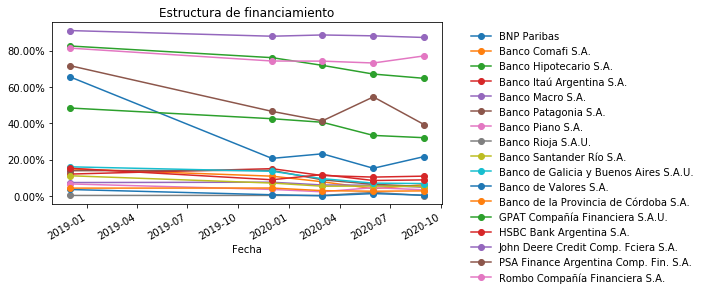

In [92]:

var= "Estructura de financiamiento"
ax=balances2[(balances2["Calificado"]=="Si")&(balances2["Balance"]=="Consolidado")].pivot_table(index="Fecha",columns="Nombre", values=var).plot(marker="o",figsize=(10, 4))
legend= plt.legend(loc='upper left',frameon=False,bbox_to_anchor=(1.05, 1)) 
plt.title(var)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.tight_layout()
plt.autoscale(enable=True, axis='x')
plt.show()

In [93]:
path = r"C:\Users\WeigandI\moodys.com\Bogarin, Juan - Moody's Local Automation Team\balances5.xlsx"
writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
balances.to_excel(writer, sheet_name ="Data")      
balances2.to_excel(writer, sheet_name ="Ind")  
writer.save()
writer.close()

In [94]:
balances3=balances2.set_index("Fecha").loc["2020-09":].reset_index()
balances3=balances3.loc[(balances3['Balance']=="Consolidado")&(balances3['Calificado']=="Si")][["Nombre", "Clasificación","Fecha",'TOTAL DE ACTIVO','TOTAL DE PASIVO', 'PATRIMONIO NETO', 'RESULTADO NETO DEL PERIODO',
       'CARGO POR INCOBRABILIDAD',  'Préstamos vencidos/préstamos netos','Préstamos vencidos/préstamos brutos','Previsiones/Préstamos vencidos','Capital','Capital tangible','Rentabilidad',
        'ROAA', 'ROAE','Estructura de financiamiento', 'Recursos líquidos', '50 SIGUIENTES MAYORES CLIENTES(Pres)',
       '10 MAYORES CLIENTES(Pres)','10 MAYORES CLIENTES(Dep)' ,'50 SIGUIENTES MAYORES CLIENTES(Dep)'  ,'Calificado'  ]]
balances4=balances2.loc[(balances2['Balance']=="Consolidado")&(balances2['Calificado']=="No")][["Nombre", "Clasificación","Fecha",'TOTAL DE ACTIVO','TOTAL DE PASIVO', 'PATRIMONIO NETO', 'RESULTADO NETO DEL PERIODO',
       'CARGO POR INCOBRABILIDAD',  'Préstamos vencidos/préstamos netos','Préstamos vencidos/préstamos brutos','Previsiones/Préstamos vencidos','Capital','Capital tangible','Rentabilidad',
        'ROAA', 'ROAE','Estructura de financiamiento', 'Recursos líquidos', '50 SIGUIENTES MAYORES CLIENTES(Pres)',
       '10 MAYORES CLIENTES(Pres)','10 MAYORES CLIENTES(Dep)' ,'50 SIGUIENTES MAYORES CLIENTES(Dep)'  ,'Calificado'  ]]
balances4=pd.concat([balances3,balances4])

In [96]:
path = r"C:\Users\WeigandI\moodys.com\Gomez Barreca, Eliana - FIG Moodys Local - Shared with ML FIG team\Bancos Argentina\Comparativos FIG\base comparativo.xlsx"
writer = pd.ExcelWriter(path, engine = 'xlsxwriter')
balances4.to_excel(writer, sheet_name ="Data")      

writer.save()
writer.close()

In [29]:
indicadores=['TOTAL DE ACTIVO',       'TOTAL DE PASIVO', 'PATRIMONIO NETO', 'RESULTADO NETO DEL PERIODO',
       'CARGO POR INCOBRABILIDAD', 'Rentabilidad', 'Préstamos vencidos/préstamos netos',
       'Préstamos vencidos/préstamos brutos', 'ROA', 'ROE', 'ROAA', 'ROAE',
       'Estructura de financiamiento', 'Recursos líquidos',
       'Previsiones/Préstamos vencidos', 'Capital tangible', 'Capital']

def grafo(indicador):
    fig=px.line(balances2[(balances2["Calificado"]=="Si")&(balances2["Balance"]=="Consolidado")], x="Fecha" , y=indicador, color="Banco")
    #fig.update_layout(yaxis_tickformat = '%')
    #fig.update_layout(autosize=False,width=700,height=400,margin=dict(l=50,r=50,b=50,t=50,pad=4))
    fig.show()
        
interact(grafo,indicador=indicadores);

interactive(children=(Dropdown(description='indicador', options=('TOTAL DE ACTIVO', 'TOTAL DE PASIVO', 'PATRIM…